# MINOR PROJECT | ETMN100

# Flood Prediction Model



#

In [1]:
#Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Gather data to preprocess the training and validation data

In [2]:
# Load training/validation data
trainval_data = pd.read_csv('train.csv')

In [3]:
trainval_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Flood
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,Yes
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,Yes
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,No
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,Yes
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,No


In [4]:
#Check for any colomns is left empty
trainval_data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Flood          0
dtype: int64

In [5]:
#The data is required in numbers, therefore replace the yes/no in floods coloumn by 1/0
trainval_data['Flood'].replace(['Yes','No'],[1,0],inplace=True)

In [6]:
trainval_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Flood
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,1
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,1
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,0
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,1
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,0


In [7]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'SUBDIVISION' is the column name in your dataset
label_encoder = LabelEncoder()
trainval_data['subdivision_encoded'] = label_encoder.fit_transform(trainval_data['SUBDIVISION'])

In [8]:
trainval_data.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Flood,subdivision_encoded
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,1,0
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,1,0
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,0,0
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,1,0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,0,0
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,0,0
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,1,0
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,1,0
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,0,0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,0,0


In [9]:
#moving the encoded subdivision column infront to easily separate target variable in trainval_data
column_order = ['subdivision_encoded', 'SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Flood']
# Rearrange columns based on 'column_order'
trainval_data = trainval_data[column_order]
trainval_data.head()

,subdivision_encoded,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Flood
0,0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,1
1,0,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,1
2,0,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,0
3,0,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,1
4,0,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,0


In [10]:
trainval_data.drop('SUBDIVISION', axis=1, inplace=True)

In [11]:
#Seperate the data for prediction
X = trainval_data.iloc[:,0:15]
X.head()

,subdivision_encoded,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7


In [12]:
X.tail()

,subdivision_encoded,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
4085,18,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7
4086,18,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5
4087,18,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3
4088,18,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0
4089,18,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9


## Preprocessing the test dataset

In [13]:
# Load testing data
test_data = pd.read_csv('maintest.csv')

In [14]:
test_data.head()

,SUBDIVISIONS,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,FLOOD
0,ANDAMAN & NICOBAR ISLANDS,2019,173.8,5.8,15.8,35.3,230.9,662.2,212.0,860.4,596.8,136.6,131.9,24.5,3086.0,YES
1,ANDAMAN & NICOBAR ISLANDS,2021,42.7,48.8,38.3,150.2,414.1,315.9,535.3,506.5,667.3,413.1,265.7,95.5,3493.4,YES
2,ANDAMAN & NICOBAR ISLANDS,2016,72.0,15.8,5.4,2.4,191.1,429.4,301.2,227.7,604.3,287.2,181.7,533.7,2851.9,NO
3,ANDAMAN & NICOBAR ISLANDS,2017,228.7,5.6,33.0,108.3,275.8,349.1,389.4,414.7,372.8,263.0,205.9,243.7,2890.0,NO
4,ANDAMAN & NICOBAR ISLANDS,2018,167.3,36.2,21.5,90.0,372.5,518.4,239.1,415.7,395.9,298.9,239.6,318.4,3113.5,YES


In [15]:
#Check for any colomns is left empty
test_data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISIONS    0
YEAR            0
JAN             0
FEB             0
MAR             0
APR             0
MAY             0
JUN             0
JUL             0
AUG             0
SEP             0
OCT             0
NOV             0
DEC             0
ANNUAL          0
FLOOD           0
dtype: int64

In [16]:
#The data is required in numbers, therefore replace the yes/no in floods coloumn by 1/0
test_data['FLOOD'].replace(['YES','NO'],[1,0],inplace=True)

In [17]:
test_data.head()

,SUBDIVISIONS,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,FLOOD
0,ANDAMAN & NICOBAR ISLANDS,2019,173.8,5.8,15.8,35.3,230.9,662.2,212.0,860.4,596.8,136.6,131.9,24.5,3086.0,1
1,ANDAMAN & NICOBAR ISLANDS,2021,42.7,48.8,38.3,150.2,414.1,315.9,535.3,506.5,667.3,413.1,265.7,95.5,3493.4,1
2,ANDAMAN & NICOBAR ISLANDS,2016,72.0,15.8,5.4,2.4,191.1,429.4,301.2,227.7,604.3,287.2,181.7,533.7,2851.9,0
3,ANDAMAN & NICOBAR ISLANDS,2017,228.7,5.6,33.0,108.3,275.8,349.1,389.4,414.7,372.8,263.0,205.9,243.7,2890.0,0
4,ANDAMAN & NICOBAR ISLANDS,2018,167.3,36.2,21.5,90.0,372.5,518.4,239.1,415.7,395.9,298.9,239.6,318.4,3113.5,1


In [18]:
#encoding string to integer
label_encoder = LabelEncoder()
test_data['subdivision_encoded'] = label_encoder.fit_transform(test_data['SUBDIVISIONS'])

In [19]:
test_data.head(10)

,SUBDIVISIONS,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,FLOOD,subdivision_encoded
0,ANDAMAN & NICOBAR ISLANDS,2019,173.8,5.8,15.8,35.3,230.9,662.2,212.0,860.4,596.8,136.6,131.9,24.5,3086.0,1,1
1,ANDAMAN & NICOBAR ISLANDS,2021,42.7,48.8,38.3,150.2,414.1,315.9,535.3,506.5,667.3,413.1,265.7,95.5,3493.4,1,1
2,ANDAMAN & NICOBAR ISLANDS,2016,72.0,15.8,5.4,2.4,191.1,429.4,301.2,227.7,604.3,287.2,181.7,533.7,2851.9,0,1
3,ANDAMAN & NICOBAR ISLANDS,2017,228.7,5.6,33.0,108.3,275.8,349.1,389.4,414.7,372.8,263.0,205.9,243.7,2890.0,0,1
4,ANDAMAN & NICOBAR ISLANDS,2018,167.3,36.2,21.5,90.0,372.5,518.4,239.1,415.7,395.9,298.9,239.6,318.4,3113.5,1,1
5,ANDHRA PRADESH,2017,2.2,0.0,12.5,8.8,34.7,124.1,110.8,202.1,164.0,164.2,41.0,3.8,868.2,0,2
6,ANDHRA PRADESH,2018,0.1,2.0,16.7,24.9,51.7,90.5,117.1,141.3,97.7,46.9,38.7,36.2,663.8,0,2
7,ARUNACHAL PRADESH,2016,29.4,73.2,128.4,333.1,278.9,379.4,620.1,145.7,532.9,172.7,8.4,4.6,2706.8,0,3
8,ARUNACHAL PRADESH,2017,8.2,86.2,221.8,348.2,257.1,370.8,437.8,456.4,318.6,227.1,9.9,3.4,2745.5,0,3
9,ARUNACHAL PRADESH,2018,30.9,67.7,139.5,150.7,269.9,320.7,341.7,247.3,288.8,57.6,60.6,14.8,1990.2,0,3


In [20]:
#moving the encoded subdivision column infront to easily separate target variable in test_data
column_order = ['subdivision_encoded', 'SUBDIVISIONS', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'FLOOD']
# Rearrange columns based on 'column_order'
test_data = test_data[column_order]
test_data.head()

,subdivision_encoded,SUBDIVISIONS,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,FLOOD
0,1,ANDAMAN & NICOBAR ISLANDS,2019,173.8,5.8,15.8,35.3,230.9,662.2,212.0,860.4,596.8,136.6,131.9,24.5,3086.0,1
1,1,ANDAMAN & NICOBAR ISLANDS,2021,42.7,48.8,38.3,150.2,414.1,315.9,535.3,506.5,667.3,413.1,265.7,95.5,3493.4,1
2,1,ANDAMAN & NICOBAR ISLANDS,2016,72.0,15.8,5.4,2.4,191.1,429.4,301.2,227.7,604.3,287.2,181.7,533.7,2851.9,0
3,1,ANDAMAN & NICOBAR ISLANDS,2017,228.7,5.6,33.0,108.3,275.8,349.1,389.4,414.7,372.8,263.0,205.9,243.7,2890.0,0
4,1,ANDAMAN & NICOBAR ISLANDS,2018,167.3,36.2,21.5,90.0,372.5,518.4,239.1,415.7,395.9,298.9,239.6,318.4,3113.5,1


In [21]:
test_data.drop('SUBDIVISIONS', axis=1, inplace=True)

In [22]:
test_data.head(10)

,subdivision_encoded,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,FLOOD
0,1,2019,173.8,5.8,15.8,35.3,230.9,662.2,212.0,860.4,596.8,136.6,131.9,24.5,3086.0,1
1,1,2021,42.7,48.8,38.3,150.2,414.1,315.9,535.3,506.5,667.3,413.1,265.7,95.5,3493.4,1
2,1,2016,72.0,15.8,5.4,2.4,191.1,429.4,301.2,227.7,604.3,287.2,181.7,533.7,2851.9,0
3,1,2017,228.7,5.6,33.0,108.3,275.8,349.1,389.4,414.7,372.8,263.0,205.9,243.7,2890.0,0
4,1,2018,167.3,36.2,21.5,90.0,372.5,518.4,239.1,415.7,395.9,298.9,239.6,318.4,3113.5,1
5,2,2017,2.2,0.0,12.5,8.8,34.7,124.1,110.8,202.1,164.0,164.2,41.0,3.8,868.2,0
6,2,2018,0.1,2.0,16.7,24.9,51.7,90.5,117.1,141.3,97.7,46.9,38.7,36.2,663.8,0
7,3,2016,29.4,73.2,128.4,333.1,278.9,379.4,620.1,145.7,532.9,172.7,8.4,4.6,2706.8,0
8,3,2017,8.2,86.2,221.8,348.2,257.1,370.8,437.8,456.4,318.6,227.1,9.9,3.4,2745.5,0
9,3,2018,30.9,67.7,139.5,150.7,269.9,320.7,341.7,247.3,288.8,57.6,60.6,14.8,1990.2,0


## EDA

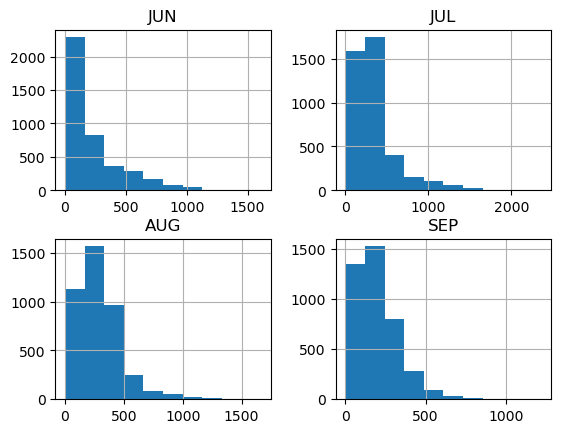

In [23]:
#Explore how rainfall index varies during rainy season for trainval_data
%matplotlib inline
c = trainval_data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

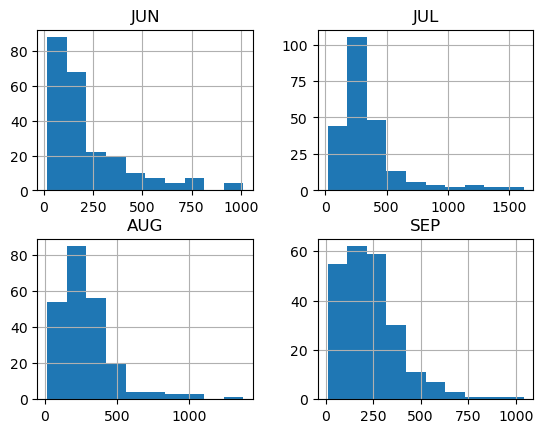

In [24]:
#Explore how rainfall index varies during rainy season for test dataset
%matplotlib inline
c = test_data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

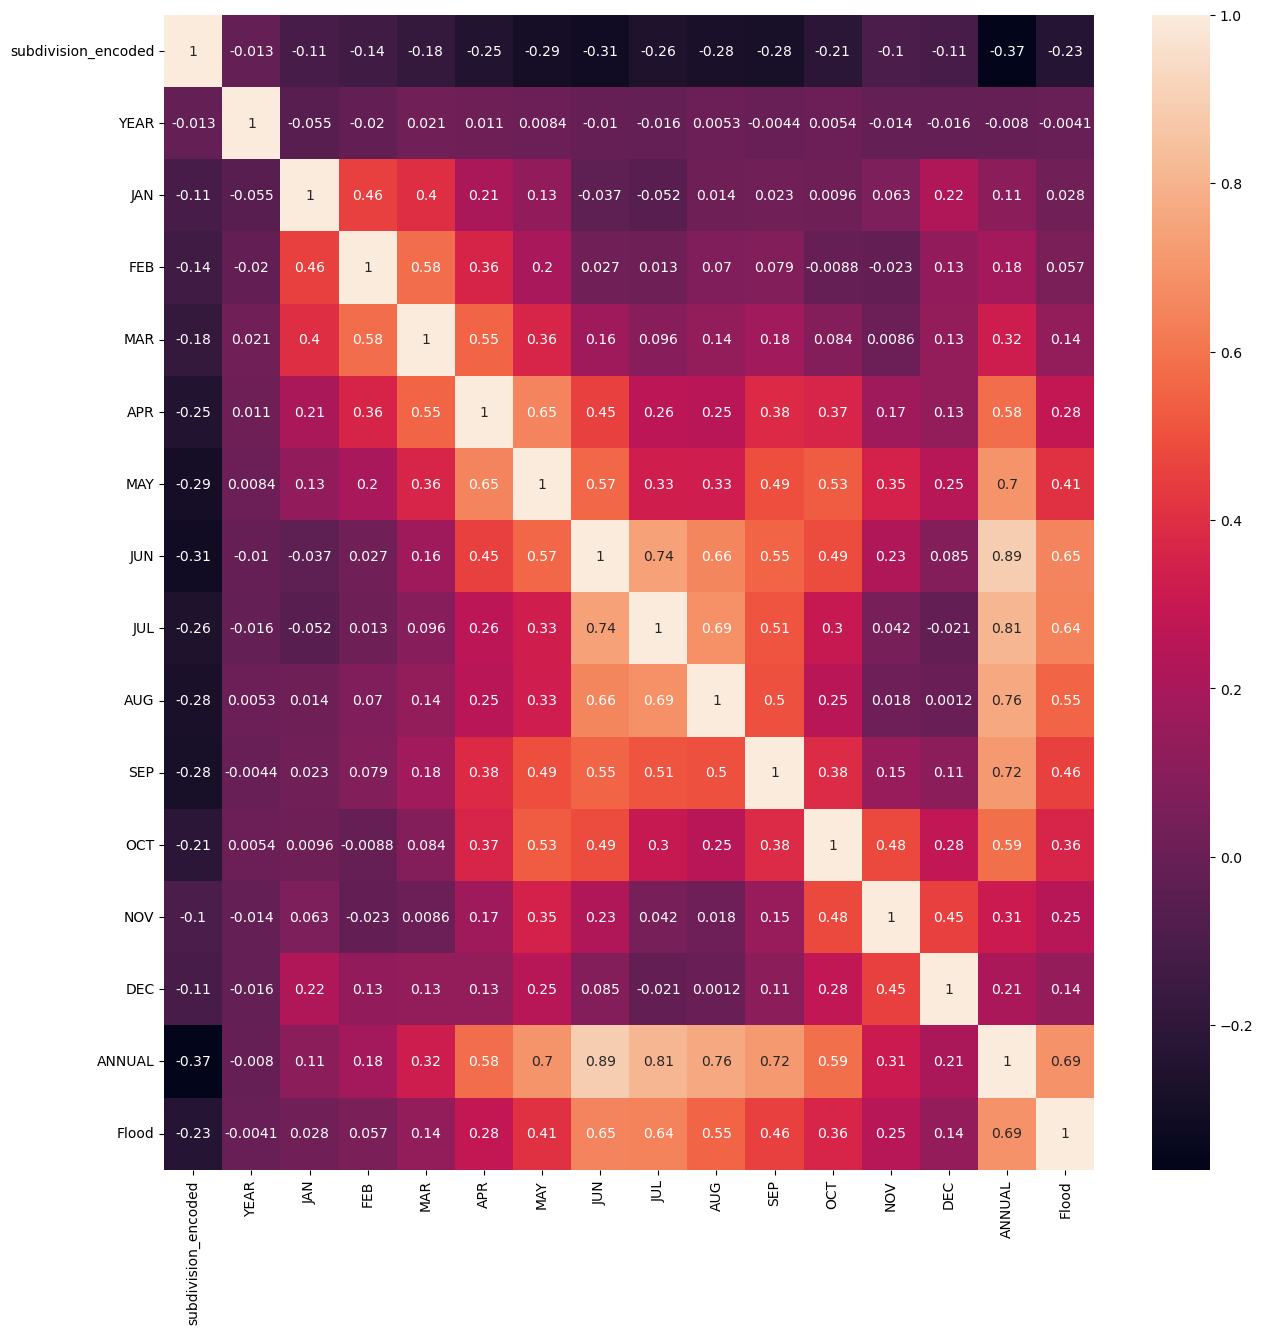

In [25]:
#Calculate correlation matrix for training and validation set
corr_matrix = trainval_data.corr()
plt.figure(figsize=(15,15))

#Lpot heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)

plt.show()

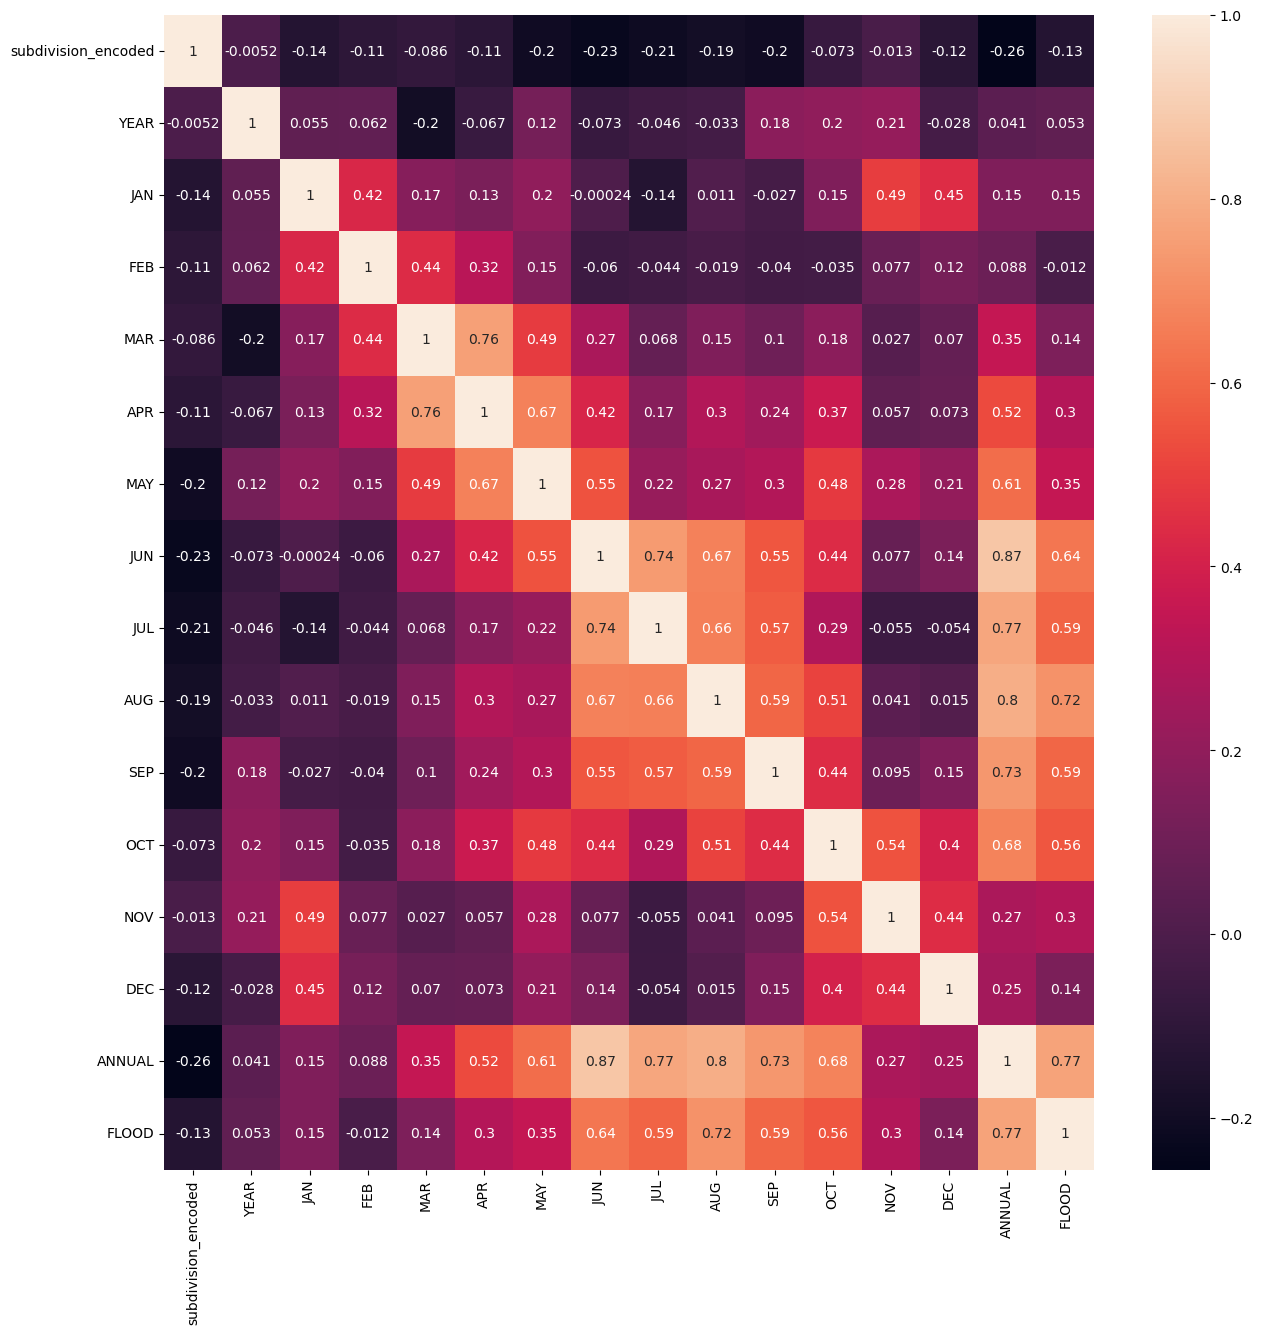

In [26]:
#Calculate correlation matrix for test dataset
corr_matrix = test_data.corr()
plt.figure(figsize=(15,15))

#Lpot heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [32]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[0.        , 0.        , 0.08428987, ..., 0.860225  , 0.05441296,
        0.52815531],
       [0.        , 0.00877193, 0.        , ..., 0.55324395, 0.25991903,
        0.55168453],
       [0.        , 0.01754386, 0.02175775, ..., 0.43828017, 0.36437247,
        0.46182682],
       ...,
       [0.51428571, 0.98245614, 0.04488607, ..., 0.12035753, 0.04323887,
        0.2175855 ],
       [0.51428571, 0.99122807, 0.09114271, ..., 0.0909231 , 0.10089069,
        0.21259252],
       [0.51428571, 1.        , 0.00376906, ..., 0.35598706, 0.25748988,
        0.25213757]])

## Flood Prediction Algorithms

### 1. KNN Classifier

In [33]:
from sklearn.model_selection import train_test_split

# Split the training+validation data into training (80%) and validation (20%)
X_trainval, X_val, y_trainval, y_val = train_test_split(
    trainval_data.drop('Flood', axis=1),  # Features
    trainval_data['Flood'],  # Target variable
    test_size=0.2,  # Validation size
    random_state=42
)

# Remaining training data after splitting
X_train, y_train = X_trainval, y_trainval

In [34]:
#Train and validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = knn.predict(X_val)

In [35]:
# Evaluate performance on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
# Additional evaluation metrics or reports for validation set
report_val = classification_report(y_val, y_pred_val)
print("Validation Classification Report:\n", report_val)

Validation Accuracy: 0.9902200488997555
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       751
           1       0.97      0.91      0.94        67

    accuracy                           0.99       818
   macro avg       0.98      0.95      0.97       818
weighted avg       0.99      0.99      0.99       818



In [36]:
# Test the trained model on the separate test set
# Separate test data
X_test, y_test = test_data.drop('FLOOD', axis=1), test_data['FLOOD']

# Predict on the test set
y_pred_test = knn.predict(X_test)
# Evaluate performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)
# Additional evaluation metrics or reports for test set
report_test = classification_report(y_test, y_pred_test)
print("Test Classification Report:\n", report_test)

Test Accuracy: 0.991304347826087
Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       210
           1       1.00      0.90      0.95        20

    accuracy                           0.99       230
   macro avg       1.00      0.95      0.97       230
weighted avg       0.99      0.99      0.99       230



### 2. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# Initialize Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_log_reg = log_reg.predict(X_val)

In [39]:
# Evaluate performance on validation set
accuracy_val_log_reg = accuracy_score(y_val, y_pred_val_log_reg)
print("Validation Accuracy:", accuracy_val_log_reg)
# Additional evaluation metrics or reports for validation set
report_val_log_reg = classification_report(y_val, y_pred_val_log_reg)
print("Validation Classification Report:\n", report_val_log_reg)

Validation Accuracy: 0.9926650366748166
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       751
           1       0.93      0.99      0.96        67

    accuracy                           0.99       818
   macro avg       0.96      0.99      0.98       818
weighted avg       0.99      0.99      0.99       818



In [40]:
# Test the trained model on the separate test set
y_pred_test_log_reg = log_reg.predict(X_test)
# Evaluate performance on the test set
accuracy_test_log_reg = accuracy_score(y_test, y_pred_test_log_reg)
print("Test Accuracy:", accuracy_test)
# Additional evaluation metrics or reports for test set
report_test_log_reg = classification_report(y_test, y_pred_test_log_reg)
print("Test Classification Report:\n", report_test_log_reg)

Test Accuracy: 0.991304347826087
Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       210
           1       1.00      0.90      0.95        20

    accuracy                           0.99       230
   macro avg       1.00      0.95      0.97       230
weighted avg       0.99      0.99      0.99       230



### 2. Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree.fit(X_train, y_train)
# Validate on the validation set
y_pred_val_dec_tre = decision_tree.predict(X_val)

In [43]:
# Evaluate performance on validation set
accuracy__dec_tre = accuracy_score(y_val, y_pred_val_dec_tre)
print("Validation Accuracy:", accuracy__dec_tre)
# Additional evaluation metrics or reports for validation set
report__dec_tre = classification_report(y_val, y_pred_val_dec_tre)
print("Validation Classification Report:\n", report__dec_tre)

Validation Accuracy: 1.0
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       751
           1       1.00      1.00      1.00        67

    accuracy                           1.00       818
   macro avg       1.00      1.00      1.00       818
weighted avg       1.00      1.00      1.00       818



In [44]:
# Test the trained model on the separate test set
y_pred_test_dec_tre = decision_tree.predict(X_test)
# Evaluate performance on the test set
accuracy_dec_tre = accuracy_score(y_test, y_pred_test_dec_tre)
print("Test Accuracy:", accuracy_dec_tre)
# Additional evaluation metrics or reports for test set
report_dec_tre = classification_report(y_test, y_pred_test_dec_tre)
print("Test Classification Report:\n", report_dec_tre)

Test Accuracy: 1.0
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00        20

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



### 4. Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42) # You can set other hyperparameters as ne
# Train the model on the training set
random_forest.fit(X_train, y_train)
# Validate on the validation set
y_pred_val_ran_for = random_forest.predict(X_val)

In [46]:
# Evaluate performance on validation set
accuracy_ran_for = accuracy_score(y_val, y_pred_val_ran_for)
print("Validation Accuracy:", accuracy_ran_for)
# Additional evaluation metrics or reports for validation set
report_ran_for = classification_report(y_val, y_pred_val_ran_for)
print("Validation Classification Report:\n", report_ran_for)

Validation Accuracy: 1.0
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       751
           1       1.00      1.00      1.00        67

    accuracy                           1.00       818
   macro avg       1.00      1.00      1.00       818
weighted avg       1.00      1.00      1.00       818



In [47]:
# Test the trained model on the separate test set
y_pred_test_ran_for = random_forest.predict(X_test)
# Evaluate performance on the test set
accuracy_ran_for = accuracy_score(y_test, y_pred_test_ran_for)
print("Test Accuracy:", accuracy_ran_for)
# Additional evaluation metrics or reports for test set
report_ran_for = classification_report(y_test, y_pred_test_ran_for)
print("Test Classification Report:\n", report_ran_for)

Test Accuracy: 1.0
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00        20

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



### 5. SVM

In [48]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)  # Example with a linear kernel and regularization parameter C=1.0
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_svm = svm_model.predict(X_val)

In [49]:
# Evaluate performance on validation set
accuracy_val_svm = accuracy_score(y_val, y_pred_val_svm)
print("Validation Accuracy:", accuracy_val_svm)
# Additional evaluation metrics or reports for validation set
report_val_svm = classification_report(y_val, y_pred_val_svm)
print("Validation Classification Report:\n", report_val_svm)

Validation Accuracy: 1.0
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       751
           1       1.00      1.00      1.00        67

    accuracy                           1.00       818
   macro avg       1.00      1.00      1.00       818
weighted avg       1.00      1.00      1.00       818



In [50]:
# Test the trained model on the separate test set
y_pred_test_svm = svm_model.predict(X_test)
# Evaluate performance on the test set
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
print("Test Accuracy:", accuracy_test_svm)
# Additional evaluation metrics or reports for test set
report_test_svm = classification_report(y_test, y_pred_test_svm)
print("Test Classification Report:\n", report_test_svm)

Test Accuracy: 1.0
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00        20

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



### 6. Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_nb = naive_bayes_model.predict(X_val)

In [53]:
# Evaluate performance on validation set
accuracy_val_nb = accuracy_score(y_val, y_pred_val_nb)
print("Validation Accuracy:", accuracy_val_nb)
# Additional evaluation metrics or reports for validation set
report_val_nb = classification_report(y_val, y_pred_val_nb)
print("Validation Classification Report:\n", report_val_nb)

Validation Accuracy: 0.8936430317848411
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       751
           1       0.44      1.00      0.61        67

    accuracy                           0.89       818
   macro avg       0.72      0.94      0.77       818
weighted avg       0.95      0.89      0.91       818



In [54]:
# Test the trained model on the separate test set
y_pred_test_nb = naive_bayes_model.predict(X_test)
# Evaluate performance on the test set
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)
print("Test Accuracy:", accuracy_test_nb)
# Additional evaluation metrics or reports for test set
report_test_nb = classification_report(y_test, y_pred_test_nb)
print("Test Classification Report:\n", report_test_nb)

Test Accuracy: 0.9478260869565217
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       210
           1       0.62      1.00      0.77        20

    accuracy                           0.95       230
   macro avg       0.81      0.97      0.87       230
weighted avg       0.97      0.95      0.95       230



## Compare the models

In [55]:
models = [knn, log_reg, decision_tree, random_forest,svm_model ,naive_bayes_model ]
model_names = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest','SVM','Naive Bayes']
for model, name in zip(models, model_names):
 # Train the model on the training set
 model.fit(X_train, y_train)
 
 # Validate the model on the validation set
 y_pred_val = model.predict(X_val)
 
 # Evaluate model performance on validation set
 accuracy_val = accuracy_score(y_val, y_pred_val)
 # Print or store the validation results for comparison
 print(f"{name} Validation Accuracy: {accuracy_val}")

KNN Validation Accuracy: 0.9902200488997555
Logistic Regression Validation Accuracy: 0.9926650366748166
Decision Tree Validation Accuracy: 1.0
Random Forest Validation Accuracy: 1.0
SVM Validation Accuracy: 1.0
Naive Bayes Validation Accuracy: 0.8936430317848411


### Validation Accuracy Score vs Test Accuracy Score

In [56]:
# Validation and test accuracy scores for different models
models = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest','SVM','Naive Bayes']
val_scores = [0.990, 0.992, 1.0, 1.0, 1.0, 0.893]
test_scores = [0.991, 0.991, 1.0, 1.0, 1.0, 0.947]

# Create a DataFrame to compare accuracy scores
accuracy_df = pd.DataFrame({'Model': models, 'Validation Accuracy': val_scores, 'Test Accuracy': test_scores})

# Display the comparison table
print(accuracy_df)

                 Model  Validation Accuracy  Test Accuracy
0                  KNN                0.990          0.991
1  Logistic Regression                0.992          0.991
2        Decision Tree                1.000          1.000
3        Random Forest                1.000          1.000
4                  SVM                1.000          1.000
5          Naive Bayes                0.893          0.947


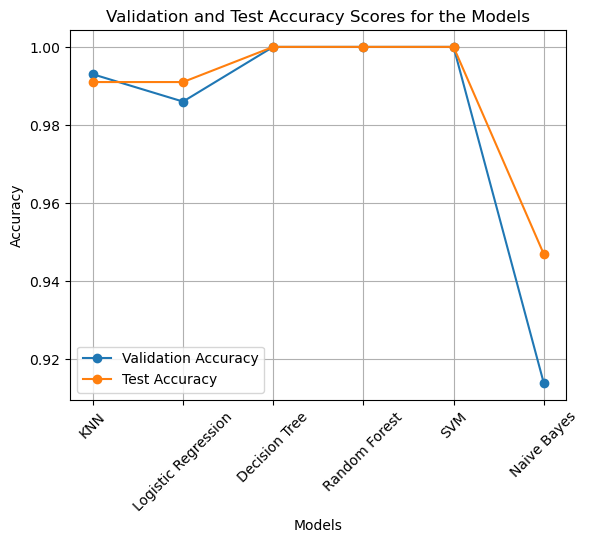

In [57]:
#plot line graph
models = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest','SVM','Naive Bayes']
val_scores = [0.993, 0.986, 1.0, 1.0, 1.0, 0.914]
test_scores = [0.991, 0.991, 1.0, 1.0, 1.0, 0.947]

plt.plot(models, val_scores, marker='o', label='Validation Accuracy')
plt.plot(models, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Validation and Test Accuracy Scores for the Models')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

From above, we can observe that Decision Tree, Random Forest and SVM show good accuracy than other models. Let us test the models with an unknown dataset.

## Validating with unknown dataset

We used 2022 year rainfall dataset for testing our trained models

In [58]:
new_data= pd.read_csv('2022rainfall.csv')

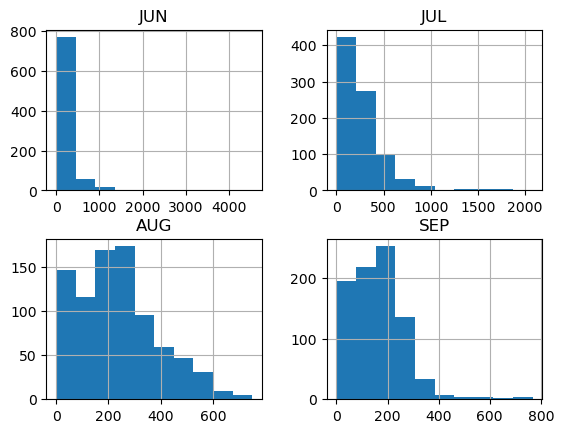

In [59]:
#Explore how rainfall index varies during rainy season for this unknown data
%matplotlib inline
c = new_data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

C:\Users\SAYANTANI DEY\AppData\Local\Temp\ipykernel_17208\637572902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_data.corr()


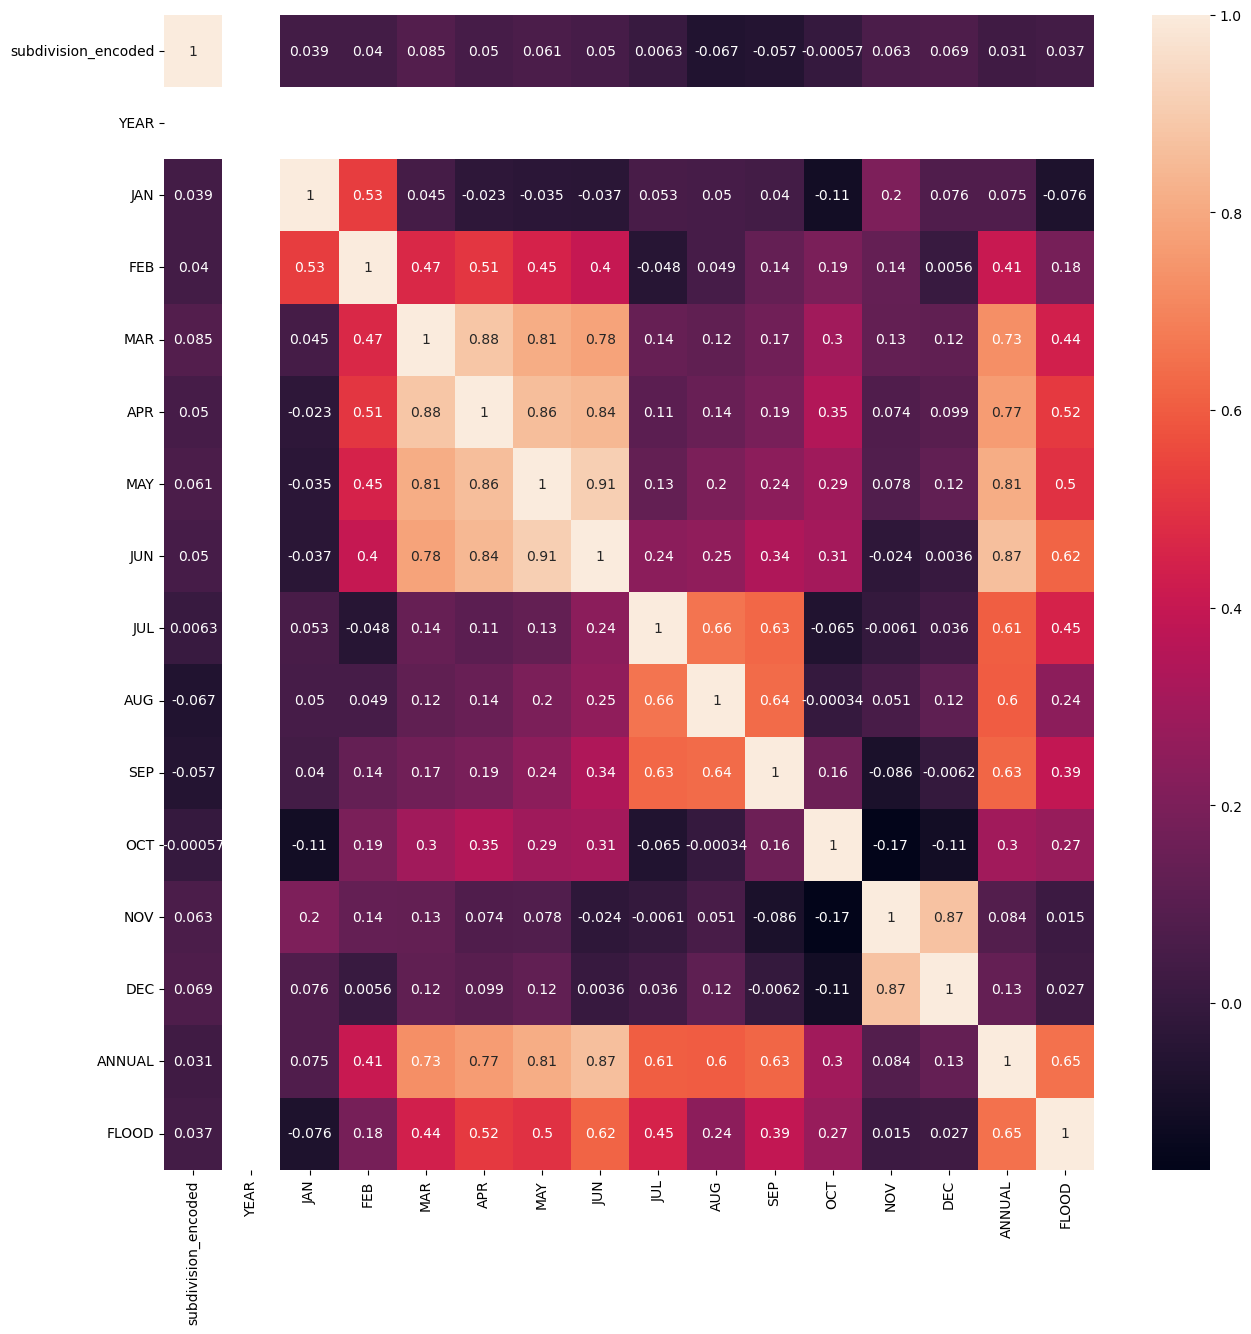

In [71]:
#Calculate correlation matrix for test dataset
corr_matrix = new_data.corr()
plt.figure(figsize=(15,15))

#Lpot heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [60]:
new_data.head()

,SUBDIVISIONS,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,FLOOD
0,24 Paraganas North,2022,13.301102,36.471586,3.000000,4.000018,174.932867,103.620638,161.875981,251.057881,276.295997,0.000000,11.158341,12.525665,1048.240076,NO
1,24 Paraganas South,2022,17.610375,54.238550,4.536690,4.114744,198.517656,122.403861,153.699521,363.866108,348.626007,0.000000,11.758986,12.112121,1291.484618,NO
2,Adilabad,2022,49.152147,2.075905,3.223715,5.998382,27.967830,188.039380,962.068860,388.144703,296.917267,68.883767,11.040415,14.652158,2018.164530,NO
3,Agar Malwa,2022,20.066857,2.000000,3.435977,4.000000,5.504517,110.842801,496.906508,632.753333,115.484463,158.121448,11.026255,12.019326,1572.161486,NO
4,Agra,2022,27.187090,5.160622,3.000000,4.000000,17.863035,40.238522,240.372088,171.096539,166.463997,133.389456,13.939188,12.000000,834.710536,NO


In [61]:
#encoding string to integer
subdiv_encoder = LabelEncoder()
new_data['subdivision_encoded'] = subdiv_encoder.fit_transform(new_data['SUBDIVISIONS'])

In [62]:
#moving the encoded subdivision column infront to easily separate target variable in test_data
column_order = ['subdivision_encoded', 'SUBDIVISIONS', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'FLOOD']
# Rearrange columns based on 'column_order'
new_data = new_data[column_order]
new_data.head()

,subdivision_encoded,SUBDIVISIONS,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,FLOOD
0,0,24 Paraganas North,2022,13.301102,36.471586,3.000000,4.000018,174.932867,103.620638,161.875981,251.057881,276.295997,0.000000,11.158341,12.525665,1048.240076,NO
1,1,24 Paraganas South,2022,17.610375,54.238550,4.536690,4.114744,198.517656,122.403861,153.699521,363.866108,348.626007,0.000000,11.758986,12.112121,1291.484618,NO
2,2,Adilabad,2022,49.152147,2.075905,3.223715,5.998382,27.967830,188.039380,962.068860,388.144703,296.917267,68.883767,11.040415,14.652158,2018.164530,NO
3,3,Agar Malwa,2022,20.066857,2.000000,3.435977,4.000000,5.504517,110.842801,496.906508,632.753333,115.484463,158.121448,11.026255,12.019326,1572.161486,NO
4,4,Agra,2022,27.187090,5.160622,3.000000,4.000000,17.863035,40.238522,240.372088,171.096539,166.463997,133.389456,13.939188,12.000000,834.710536,NO


In [63]:
#The data is required in numbers, therefore replace the yes/no in floods coloumn by 1/0
new_data['FLOOD'].replace(['YES','NO'],[1,0],inplace=True)
new_data.head()

,subdivision_encoded,SUBDIVISIONS,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,FLOOD
0,0,24 Paraganas North,2022,13.301102,36.471586,3.000000,4.000018,174.932867,103.620638,161.875981,251.057881,276.295997,0.000000,11.158341,12.525665,1048.240076,0
1,1,24 Paraganas South,2022,17.610375,54.238550,4.536690,4.114744,198.517656,122.403861,153.699521,363.866108,348.626007,0.000000,11.758986,12.112121,1291.484618,0
2,2,Adilabad,2022,49.152147,2.075905,3.223715,5.998382,27.967830,188.039380,962.068860,388.144703,296.917267,68.883767,11.040415,14.652158,2018.164530,0
3,3,Agar Malwa,2022,20.066857,2.000000,3.435977,4.000000,5.504517,110.842801,496.906508,632.753333,115.484463,158.121448,11.026255,12.019326,1572.161486,0
4,4,Agra,2022,27.187090,5.160622,3.000000,4.000000,17.863035,40.238522,240.372088,171.096539,166.463997,133.389456,13.939188,12.000000,834.710536,0


In [64]:
testing = new_data.drop('FLOOD', axis=1)
checkvar = new_data['FLOOD']

In [65]:
testing = testing.drop('SUBDIVISIONS', axis=1)
testing.head()

,subdivision_encoded,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,0,2022,13.301102,36.471586,3.000000,4.000018,174.932867,103.620638,161.875981,251.057881,276.295997,0.000000,11.158341,12.525665,1048.240076
1,1,2022,17.610375,54.238550,4.536690,4.114744,198.517656,122.403861,153.699521,363.866108,348.626007,0.000000,11.758986,12.112121,1291.484618
2,2,2022,49.152147,2.075905,3.223715,5.998382,27.967830,188.039380,962.068860,388.144703,296.917267,68.883767,11.040415,14.652158,2018.164530
3,3,2022,20.066857,2.000000,3.435977,4.000000,5.504517,110.842801,496.906508,632.753333,115.484463,158.121448,11.026255,12.019326,1572.161486
4,4,2022,27.187090,5.160622,3.000000,4.000000,17.863035,40.238522,240.372088,171.096539,166.463997,133.389456,13.939188,12.000000,834.710536


### With Decision Tree Model

In [66]:
validity_dec_tree = decision_tree.predict(testing)
print(validity_dec_tree)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [67]:
# Evaluate performance
accuracy_testing = accuracy_score(checkvar, validity_dec_tree)
print("Validation Accuracy:", accuracy_testing)

Validation Accuracy: 1.0


### With SVM model

In [68]:
testing_svm = svm_model.predict(testing)
print(testing_svm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [69]:
# Evaluate performance
accuracy_svm = accuracy_score(checkvar, testing_svm)
print("Validation Accuracy:", accuracy_svm)

Validation Accuracy: 0.9976580796252927


#### Based on the accuracy scores obtained from testing the 2022 rainfall dataset, it's evident that the Decision Tree model outperforms the SVM model. The accuracy scores showcase that the Decision Tree model exhibits better accuracy when predicting the 2022 rainfall, indicating its superior performance over the SVM model in this specific context.

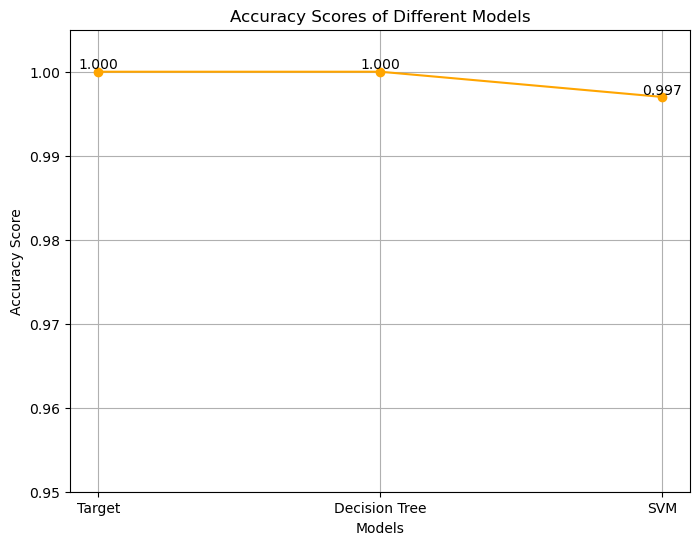

In [70]:
import matplotlib.pyplot as plt

models = ['Target','Decision Tree', 'SVM']
accuracy_scores = [1.0,1.0, 0.997]

plt.figure(figsize=(8, 6))
plt.plot(models, accuracy_scores, marker='o', linestyle='-', color='orange')

plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0.95, 1.005)  # Adjust the y-axis limits for better visualization
plt.grid(True)

# Adding data labels
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom')

plt.show()